# Object detection with model zoo model

In this tutorial, you learn how to use a built-in model zoo model (SSD) to achieve an [object detection](https://en.wikipedia.org/wiki/Object_detection) task.

## Preparation

This tutorial requires the installation of Java Kernel. To install Java Kernel, see the [README](https://docs.djl.ai/docs/demos/jupyter/index.html).

In [1]:
%maven ai.djl:api:0.32.0
%maven ai.djl.pytorch:pytorch-engine:0.32.0
%maven ai.djl.pytorch:pytorch-model-zoo:0.32.0
    
%maven org.slf4j:slf4j-simple:2.0.17

In [2]:
import ai.djl.modality.cv.*;
import ai.djl.modality.cv.output.*;
import ai.djl.modality.cv.util.*;
import ai.djl.pytorch.zoo.*;
import ai.djl.repository.zoo.*;
import ai.djl.training.util.*;

## Step 1: Load image

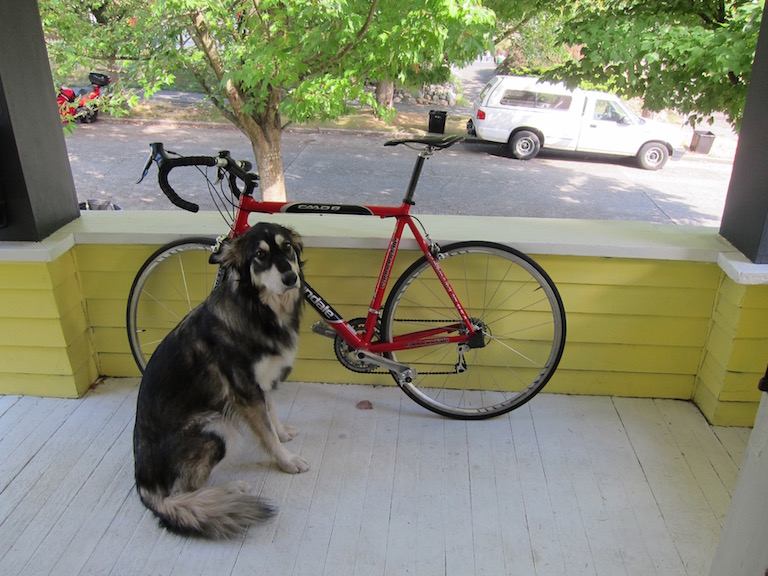

In [3]:
var img = ImageFactory.getInstance().fromUrl("https://resources.djl.ai/images/dog_bike_car.jpg");
img.getWrappedImage()

## Step 2: Load model zoo model

In this example, you load a SSD (Single Shot MultiBox Detector) model from the MXNet model zoo.
For more information about model zoo, see the [Model Zoo Documentation](https://github.com/deepjavalibrary/djl/blob/master/docs/model-zoo.md) 

In [4]:
import ai.djl.Application;

var criteria = Criteria.builder()
    .optApplication(Application.CV.OBJECT_DETECTION)
    .setTypes(Image.class, DetectedObjects.class)
    .optArgument("threshold", 0.5)
    .optEngine("PyTorch")
    .optProgress(new ProgressBar())
    .build();
var model = criteria.loadModel();

Loading:     100% |████████████████████████████████████████|


[JJava-executor-0] INFO ai.djl.pytorch.engine.PtEngine - PyTorch graph executor optimizer is enabled, this may impact your inference latency and throughput. See: https://docs.djl.ai/master/docs/development/inference_performance_optimization.html#graph-executor-optimization
[JJava-executor-0] INFO ai.djl.pytorch.engine.PtEngine - Number of inter-op threads is 12
[JJava-executor-0] INFO ai.djl.pytorch.engine.PtEngine - Number of intra-op threads is 12


## Step 3: Create Predictor and detect an object in the image

In [5]:
var detections = model.newPredictor().predict(img);

detections

[
	{"className": "dog", "probability": 0.89536, "boundingBox": {"rect":[0.16192039575808145,0.3545692367961221,0.41621068946270556,0.8977513466485931]}},
	{"className": "bicycle", "probability": 0.69023, "boundingBox": {"rect":[0.16709160452087723,0.30417555569981525,0.7525602365036805,0.7847360730109114]}},
	{"className": "truck", "probability": 0.61655, "boundingBox": {"rect":[0.6067455611246629,0.13049969804776884,0.8932783197982603,0.2942973267080987]}}
]


## Check detected result

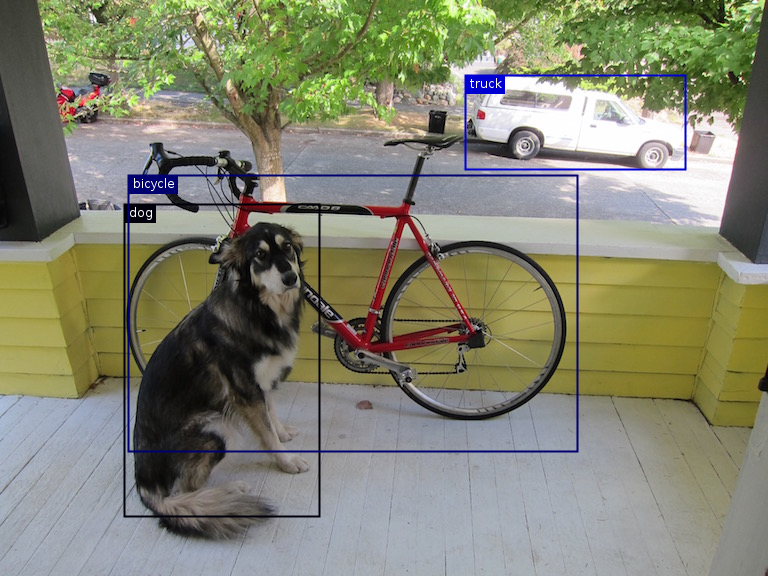

In [6]:
img.drawBoundingBoxes(detections);
img.getWrappedImage()

## Summary

Using the model zoo model provided, you can run inference with just the following lines of code:

```
var img = ImageFactory.getInstance().fromUrl("https://resources.djl.ai/images/dog_bike_car.jpg");
var criteria = Criteria.builder()
    .setTypes(Image.class, DetectedObjects.class)
    .optArtifactId("ssd")
    .build();
var model = criteria.loadModel();
var detections = model.newPredictor().predict(img);
```

You can find full SsdExample source code [here](https://github.com/deepjavalibrary/djl/blob/master/examples/docs/object_detection.md).
